# **Assignment 1**
## **Anne Kristine Tiedemann Skovbon**

#### **Answer to exercise 2.1.1**

- n_estimators: the number of trees (the estimator is always a tree) 
    - A high n_estimators will lead to high variance but also larger risk of overfitting
- max_depth: the maximum depth of the tree
    - The higher max_depth, the more splits and the more information about the data is captured
- max_features: the number of features to consider when looking for the best split
     - Increasing max_features will improve the performance of the model as at each node because we have a higher number of options to be considered, but there's a trade-off as the processing speed is decreased by the number of max_features
- bootstrap: Whether you bootstrap or not when building trees (with or without replacement)
     - If False, all of the data is used to fit the model (without replacement)

#### **Answer to exercise 2.1.2**

To get rid of randomness you should set your hyperparameters as follows:
- max_features = n_features
- bootstrap = False


#### **Answer to exercise 3.1.2**

In [35]:
def plotDimReducer(reducer, X, y, ax):
    ssc = StandardScaler()
    X_std =sc.fit_transform(X)
    
    if reducer == LDA:
        dmap = reducer().fit_transform(X_std, y)
    else:
        dmap = reducer().fit_transform(X_std)
    d1, d2 = dmap[:,0], dmap[:,1] # it picks out the two first components
    
    sct = ax.scatter(d1, d2, c=y) # the color is set by the y-value
    ax.set_title(reducer.__name__) # the name of the axis is whatever the reducer name is

/Users/annekristinetiedemann/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


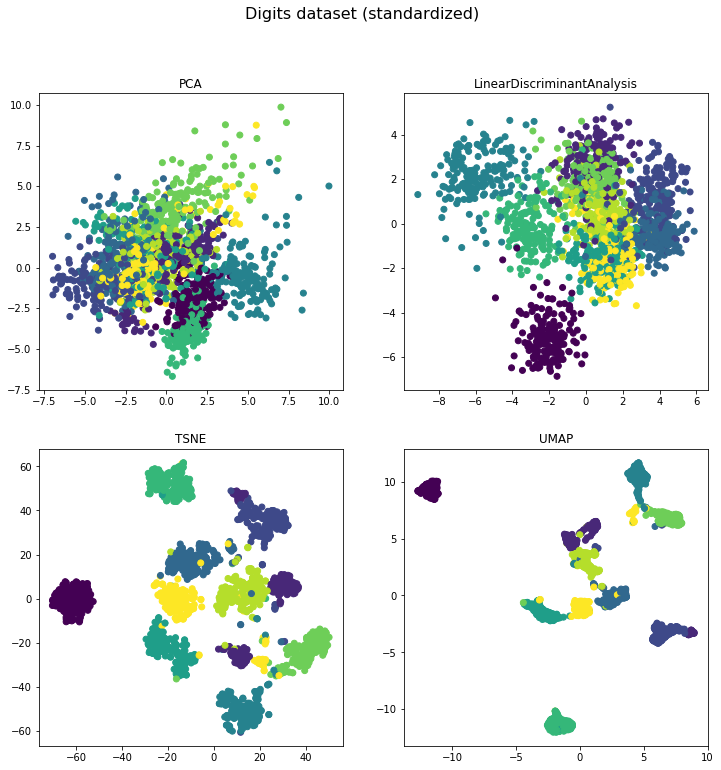

In [37]:
fig, ax = plt.subplots(2, 2, figsize =(12,12))
fig.suptitle('Digits dataset (standardized)', fontsize=16)

plotDimReducer(PCA, X_digits, y_digits, ax[0][0])
plotDimReducer(LDA, X_digits, y_digits, ax[0][1])
plotDimReducer(TSNE, X_digits, y_digits, ax[1][0])
plotDimReducer(UMAP, X_digits, y_digits, ax[1][1])

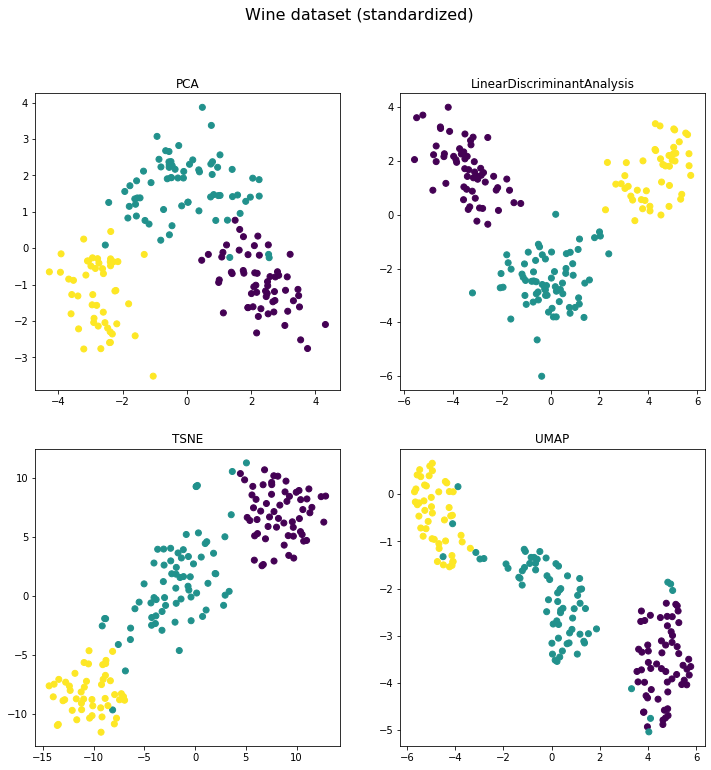

In [38]:
fig, ax = plt.subplots(2, 2, figsize =(12,12))
fig.suptitle('Wine dataset (standardized)', fontsize=16)

plotDimReducer(PCA, X_wine, y_wine, ax[0][0])
plotDimReducer(LDA, X_wine, y_wine, ax[0][1])
plotDimReducer(TSNE, X_wine, y_wine, ax[1][0])
plotDimReducer(UMAP, X_wine, y_wine, ax[1][1])

In [40]:
def plotDimReducer_notstd(reducer, X, y, ax):
    if reducer == LDA:
        dmap = reducer().fit_transform(X, y)
    else:
        dmap = reducer().fit_transform(X)
    d1, d2 = dmap[:,0], dmap[:,1] # it picks out the two first components
    
    sct = ax.scatter(d1, d2, c=y) # the color is set by the y-value
    ax.set_title(reducer.__name__) # the name of the axis is whatever the reducer name is

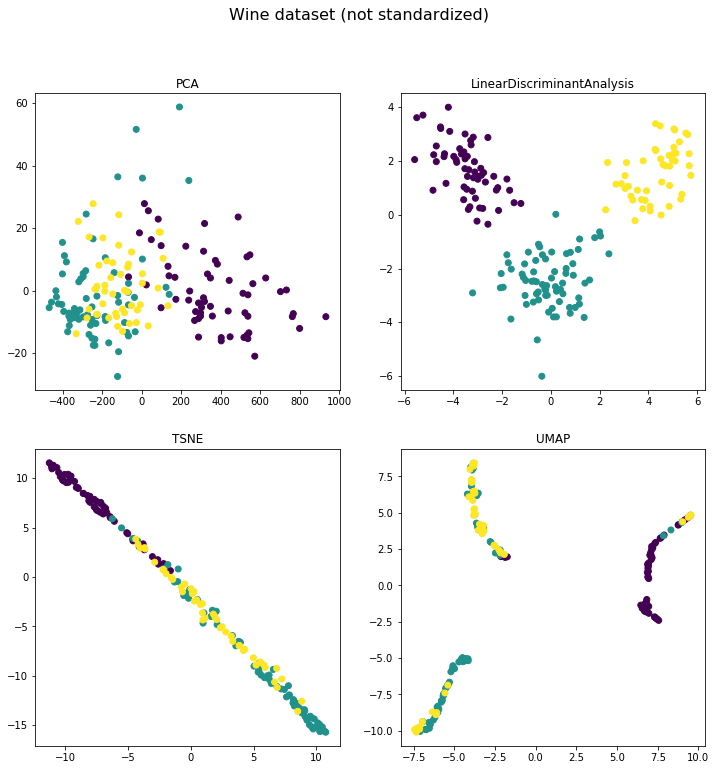

In [41]:
fig, ax = plt.subplots(2, 2, figsize =(12,12))
fig.suptitle('Wine dataset (not standardized)', fontsize=16)

plotDimReducer_notstd(PCA, X_wine, y_wine, ax[0][0])
plotDimReducer_notstd(LDA, X_wine, y_wine, ax[0][1])
plotDimReducer_notstd(TSNE, X_wine, y_wine, ax[1][0])
plotDimReducer_notstd(UMAP, X_wine, y_wine, ax[1][1])

/Users/annekristinetiedemann/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


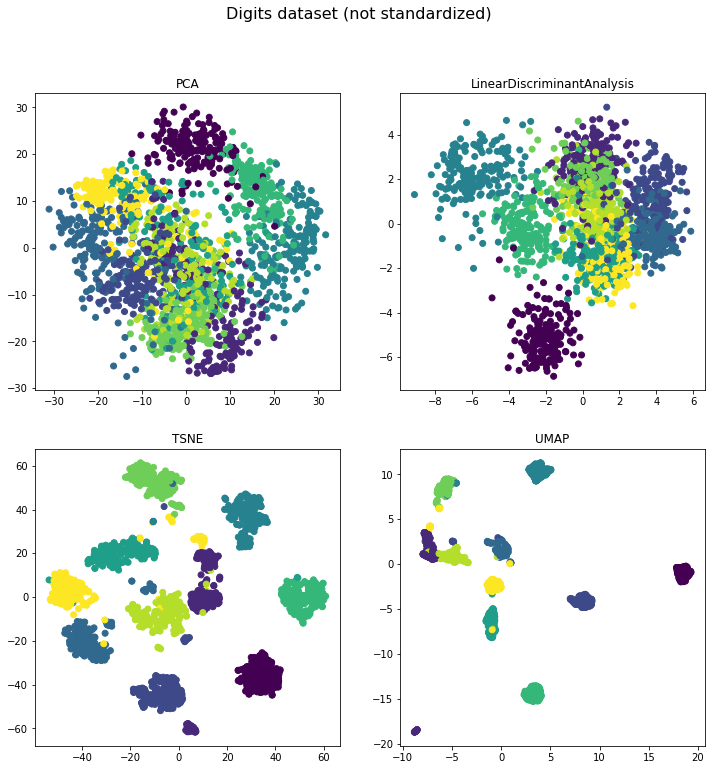

In [42]:
fig, ax = plt.subplots(2, 2, figsize =(12,12))
fig.suptitle('Digits dataset (not standardized)', fontsize=16)


plotDimReducer_notstd(PCA, X_digits, y_digits, ax[0][0])
plotDimReducer_notstd(LDA, X_digits, y_digits, ax[0][1])
plotDimReducer_notstd(TSNE, X_digits, y_digits, ax[1][0])
plotDimReducer_notstd(UMAP, X_digits, y_digits, ax[1][1])

***Comments:***

When the features of the wine dataset are not standardized, t-SNE and UMAP do not do a goods job at feature selection for dimensionality reduction while the unstandardized digits dataset does. It appears that the features of the digits dataset are already standardized which is not the case for the wine dataset.

t-SNE and UMAP are *non-linear* dimensionality reduction methods so they can capture the structure of trickier manifolds while PCA and LDA are linear methods. For this reason, the different methods will preform differently on dataset which have not been standardized, as we observe for the wine dataset.

#### **Answer to exercise 4.2.1**

A model is “honest” if it does not use the same information for selecting the model structure as it does for estimation given a model structure. The training sample is split into two parts: half of the sample is used for constructing the decision trees and the other half is used for estimating treatment-effects within leaves of the tree, allowing an "honest" evaluation of model performance. In other words, the decision tree is created using one subsample, and estimated using the leaves of the tree from a different subsample. A parallel can be drawn to test-train spilts. Both have the purpose of preventing data leakage.

"Unhonest" methods also use the training data for model selection. This can lead to biases as spurious correlations between features and outcomes can affect the selected model. There is a trade-off between precision (some is lost due to the sample splitting) and the bias arrising from using training data for model selection.

The output of an "honest" model is a set of treatment-effects for each subsample leading to "good local treatment effect estimates" since the bias from using train data for both creating and estimating the trees is eliminated.